In [554]:
import numpy as np
import pandas   as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [555]:
train  =  pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

*Models*

<ol>
<li><code>LogisticRegression</code></li>
<li><code>KNeighborsClassifier</code></li>
<li><code>SVC</code></li>
<li><code>DecisionTreeClassifier</code></li>
<li><code>RandomForestClassifier</code></li>
<li><code>GaussianNB</code></li>
<li><code>GradientBoostingClassifier</code></li>
<li><code>XGBClassifier</code></li>
<li><code>BaggingClassifier</code></li>
<li><code>AdaBoostClassifier</code></li>
<li><code>ExtraTreesClassifier</code></li>
</ol>

In [556]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [557]:
train.isna().sum(), test.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [558]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handling Missing Values

- Age
- Cabin
- Embarked
- Fare

#### Approaches
- CCA: Only use when 5% of the data is missing, apply for both numerical and categorical data
- Univariate: in case of numerical data -Replace with mean,median, arbitrary, end of distribution, random and in case of categorical data- replace with mode (create new catergory with name 'missing', Random in case of categorical data)
- Multivariate: KNN Imputer and Iterative Imputer (MICE)

In [559]:
train=train.drop(labels='Cabin', axis=1)
test=test.drop(labels='Cabin', axis=1)

In [560]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Handle Age missing values
- CCA: Only use when 5% of the data is missing, apply for both numerical and categorical data
- Univariate: Replace with mean,median, arbitrary, end of distribution, random in case of numerical data , and mode , create new catergory with name 'missing', Random in case of categorical data

In [561]:
train['Age'].notnull().sum()/891

0.8013468013468014

CCA is apply only in case when 5% data is missing

since 20 percent data is missing so we can't apply CCA

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

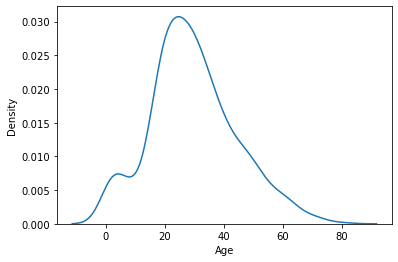

In [562]:
sns.distplot(train['Age'], hist=False) # Before 

In [563]:
train['Age'].mean()

29.69911764705882

In [564]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [565]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [566]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

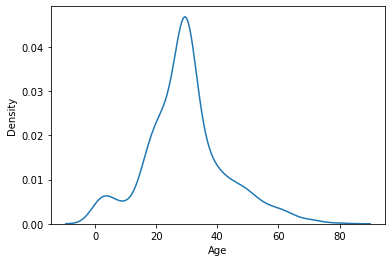

In [567]:
sns.distplot(train['Age'], hist=False) # After replace missing value with mean

In [568]:
train['Age'].mean()

29.699117647058763

In [569]:
train['Age'].notna().sum()

891

In [570]:
test.shape

(418, 10)

Comparison in pdf before and after after filling the missing value with mean

since peak shift from 0.03 to 0.04 so not good approach for filling missing data with mean

In [571]:
# plt.figure(figsize=(20,15))
# fig, axs = plt.subplots(ncols=2)
# sns.distplot(x=a, ax=axs[0],hist=False,color='r')
# sns.distplot(x=train['Age'], ax=axs[1],hist=False)

Handle Embarked missing values

using mode: more frequent categorical value is selected, used when 5 percent data is missing and 1 categorical value is dominant to the all other categorical values in the column


In [572]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [573]:
train['Embarked'].isna().sum()

2

In [574]:
test['Embarked'].isna().sum()

0

In [575]:
train['Embarked'].notnull().sum()/891 # we can use mode method

0.9977553310886644

<AxesSubplot:>

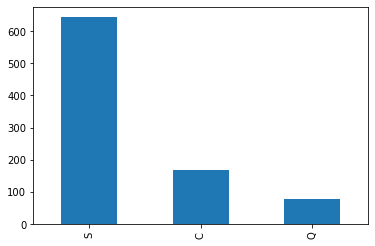

In [576]:
train['Embarked'].value_counts().plot(kind='bar')

Only 1 percent data is missing so we can easily join mode,
we can clearly see that mode is selected for Embarked is "S"

In [577]:
train['Embarked'].mode()

0    S
dtype: object

In [578]:
train['Embarked']=train['Embarked'].fillna("S")

In [579]:
train['Embarked'].notna().sum()

891

In [580]:
train.notna().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

In [581]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


<AxesSubplot:xlabel='Embarked', ylabel='count'>

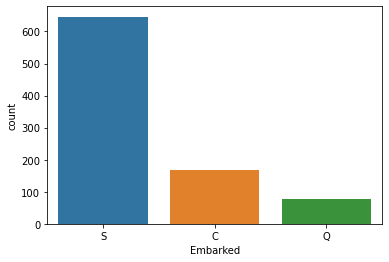

In [582]:
sns.countplot(data=train,x='Embarked')

<AxesSubplot:>

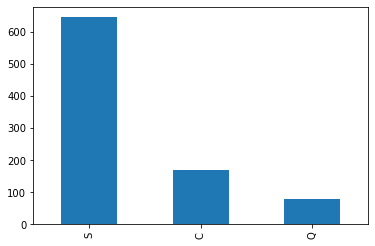

In [583]:
train['Embarked'].value_counts().plot(kind='bar')

Fill the Fare missing in test data with mean

In [584]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [585]:
test.notna().sum()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Embarked       418
dtype: int64

## Outliers

Age is never going to be outlier

In [586]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [587]:
train=train.drop(labels=['PassengerId','Name','Ticket'], axis=1)

In [588]:
test=test.drop(labels=['PassengerId','Name','Ticket'], axis=1)

In [589]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [590]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


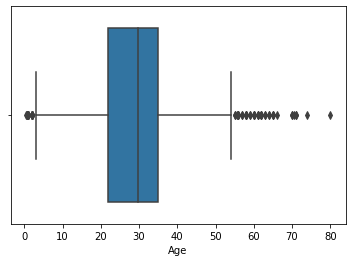

In [591]:
sns.boxplot(train["Age"])
plt.show()

## Convert categorical data into numerical one

In [592]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [593]:
train_new=pd.get_dummies(train,columns=['Pclass','SibSp','Sex','Parch','Embarked'])

In [594]:
test = pd.get_dummies(test,columns=['Pclass','SibSp','Sex','Parch','Embarked'])

In [595]:
for test_c in test.columns:
    if test_c not in train_new.columns:
        print(test_c)

Parch_9


In [596]:
test = test.drop('Parch_9',axis=1)

In [597]:
test.columns.shape

(24,)

## Splitting into X_train and Y_train and  Scaling

In [598]:
X= train_new.drop(labels='Survived',axis=1)

In [599]:
X.columns.shape

(24,)

In [600]:
y= train_new['Survived']

In [601]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [602]:
# test = test.drop(labels=['Cabin','PassengerId','Name','Ticket'],axis=1)

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [604]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_test = scaler.transform(test)

## Apply models


- Logistic Regression before transformation

In [605]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [606]:
log_model.coef_

array([[-4.57012856e-01,  9.99604395e-02,  4.88483850e-01,
         4.50110816e-02, -4.57453924e-01,  9.93774626e-02,
         1.56459639e-01,  3.48918705e-02, -2.51701709e-01,
        -1.67578663e-01, -3.54930514e-01, -4.05916526e-01,
         6.47640039e-01, -6.47640039e-01, -3.02862967e-03,
         9.83932265e-02,  2.89907285e-05,  7.77805898e-02,
        -3.36514219e-01, -9.79128379e-02, -1.80299169e-01,
         3.78253504e-02,  2.14234874e-02, -4.65430039e-02]])

Calculate Accuracy

In [607]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.7777777777777778

In [608]:
confusion_matrix(y_test,y_pred)

array([[44,  7],
       [13, 26]], dtype=int64)

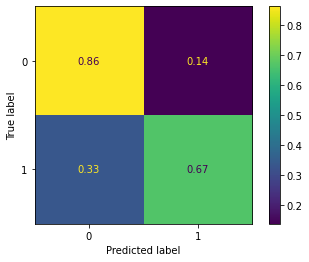

In [609]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [610]:
test_pred = log_model.predict(scaled_test)
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

- Logistic Regression After transformation

check which transformation is better, using QQ plot

In [611]:
import scipy.stats as stats

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


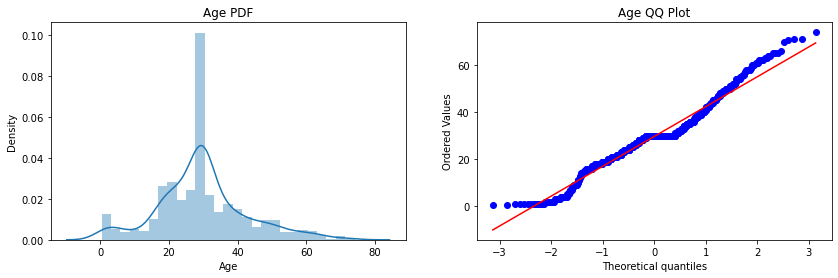

In [612]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


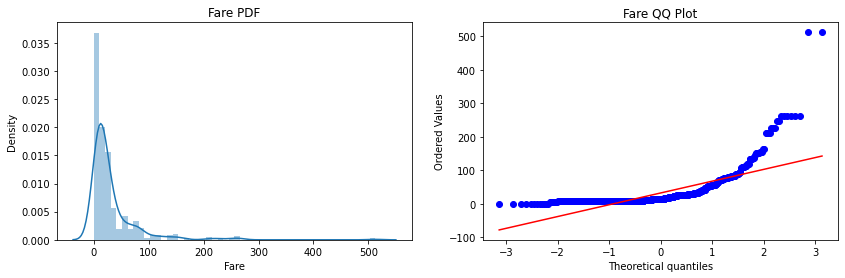

In [613]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

Age is normal distributed so no need to transform, Fare is right skewed so we need to log transform

In [614]:
from sklearn.preprocessing import FunctionTransformer

In [615]:
trf = FunctionTransformer(np.log1p)

In [616]:
scaled_X_train

array([[ 1.44758356e-03, -5.25398835e-01, -5.65335841e-01, ...,
        -4.81983083e-01,  3.33711906e+00, -1.64050122e+00],
       [-2.07754681e-01, -4.37944578e-01, -5.65335841e-01, ...,
        -4.81983083e-01, -2.99659671e-01,  6.09569801e-01],
       [-1.13784647e+00,  3.74743770e+00,  1.76886008e+00, ...,
        -4.81983083e-01, -2.99659671e-01,  6.09569801e-01],
       ...,
       [ 8.77352411e-01,  2.14110621e+00,  1.76886008e+00, ...,
         2.07476162e+00, -2.99659671e-01, -1.64050122e+00],
       [ 1.10987536e+00,  5.41395514e-01,  1.76886008e+00, ...,
         2.07476162e+00, -2.99659671e-01, -1.64050122e+00],
       [ 1.44758356e-03,  7.83289646e-01, -5.65335841e-01, ...,
        -4.81983083e-01, -2.99659671e-01,  6.09569801e-01]])

In [617]:
X_train['Fare']=trf.fit_transform(X_train['Fare'])

C:\Users\kul78\AppData\Local\Temp/ipykernel_8612/410353062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fare']=trf.fit_transform(X_train['Fare'])


In [618]:
test['Fare']=trf.fit_transform(test['Fare'])

In [619]:
X_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
825,29.699118,2.073172,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,27.000000,2.495954,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
689,15.000000,5.358177,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
513,54.000000,4.100989,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
729,25.000000,2.188856,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [620]:
X_test['Fare']=trf.transform(X_test['Fare'])

C:\Users\kul78\AppData\Local\Temp/ipykernel_8612/607098393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare']=trf.transform(X_test['Fare'])


In [621]:
X_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
331,45.500000,3.384390,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
700,18.000000,5.431646,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
748,19.000000,3.990834,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
751,6.000000,2.600836,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
481,29.699118,0.000000,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,22.000000,2.110213,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
288,42.000000,2.639057,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
827,1.000000,3.637697,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
847,35.000000,2.185579,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


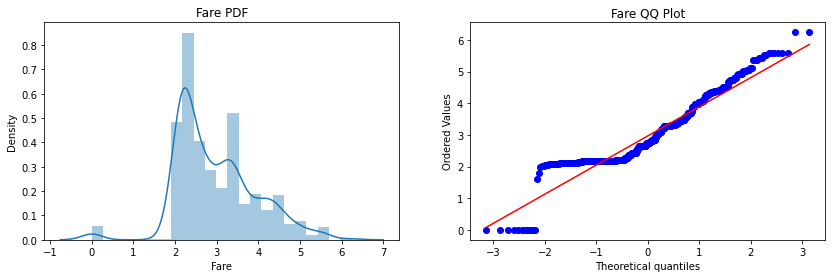

In [622]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [623]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [624]:
scaled_test = scaler.transform(test)

In [625]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [626]:
log_model.coef_

array([[-0.46309339,  0.24520436,  0.42959206,  0.04624406, -0.40770806,
         0.12882824,  0.14195741,  0.01831494, -0.25710581, -0.18047421,
        -0.36620168, -0.42132458,  0.64384089, -0.64384089,  0.01646053,
         0.09338768, -0.0165025 ,  0.07368196, -0.34201764, -0.11118527,
        -0.18565885,  0.02938997,  0.02626508, -0.04211491]])

Calculate Accuracy

In [627]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.7888888888888889

In [628]:
confusion_matrix(y_test,y_pred)

array([[44,  7],
       [12, 27]], dtype=int64)

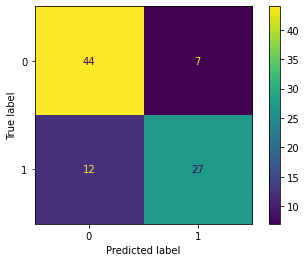

In [629]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [630]:
test_pred_1 = log_model.predict(scaled_test)

In [631]:
test_pred_1.shape

(418,)

In [641]:
test_pred_1 == test_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [633]:
submission = pd.read_csv(r'data\gender_submission.csv')

In [634]:
submission["Survived"]=test_pred

In [635]:
submission.shape

(418, 2)

In [636]:
submission['Survived'].value_counts()

0    258
1    160
Name: Survived, dtype: int64

In [637]:
submission.to_csv("First_Submission.csv",index=False)

In [638]:
submission["Survived"]=test_pred_1

In [639]:
submission['Survived'].value_counts()

0    258
1    160
Name: Survived, dtype: int64

In [640]:
submission.to_csv("Second_Submission.csv",index=False)